<a href="https://colab.research.google.com/github/diegotluz/projects-colab/blob/main/Aula_Cloud_FIAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/cloud-based-analytics_public/BI-2024/enem_sample10k.csv ')
df.head()

<ipython-input-1-cebff3834e41>:2: DtypeWarning: Columns (136,137) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://storage.googleapis.com/cloud-based-analytics_public/BI-2024/enem_sample10k.csv ')


,HASHID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,IN_TEMPO_ADICIONAL,TP_FAIXA_ETARIA
0,5020743927441300300,200001627225,2020,NaN,NaN,NaN,NaN,NaN,F,1.0,...,A,A,D,A,A,B,NaN,NaN,NaN,5.0
1,-5098962944298398439,200002192723,2020,NaN,NaN,NaN,NaN,NaN,M,1.0,...,B,A,C,B,C,B,NaN,NaN,NaN,12.0
2,3437127682735460098,200005740708,2020,NaN,NaN,NaN,NaN,NaN,M,1.0,...,A,A,E,A,A,B,NaN,NaN,NaN,6.0
3,-1985947034126707894,200001886277,2020,NaN,NaN,NaN,NaN,NaN,F,2.0,...,A,A,C,A,B,B,NaN,NaN,NaN,11.0
4,1710864359812960253,200006555845,2020,NaN,NaN,NaN,NaN,NaN,F,0.0,...,A,B,C,A,B,A,NaN,NaN,NaN,12.0


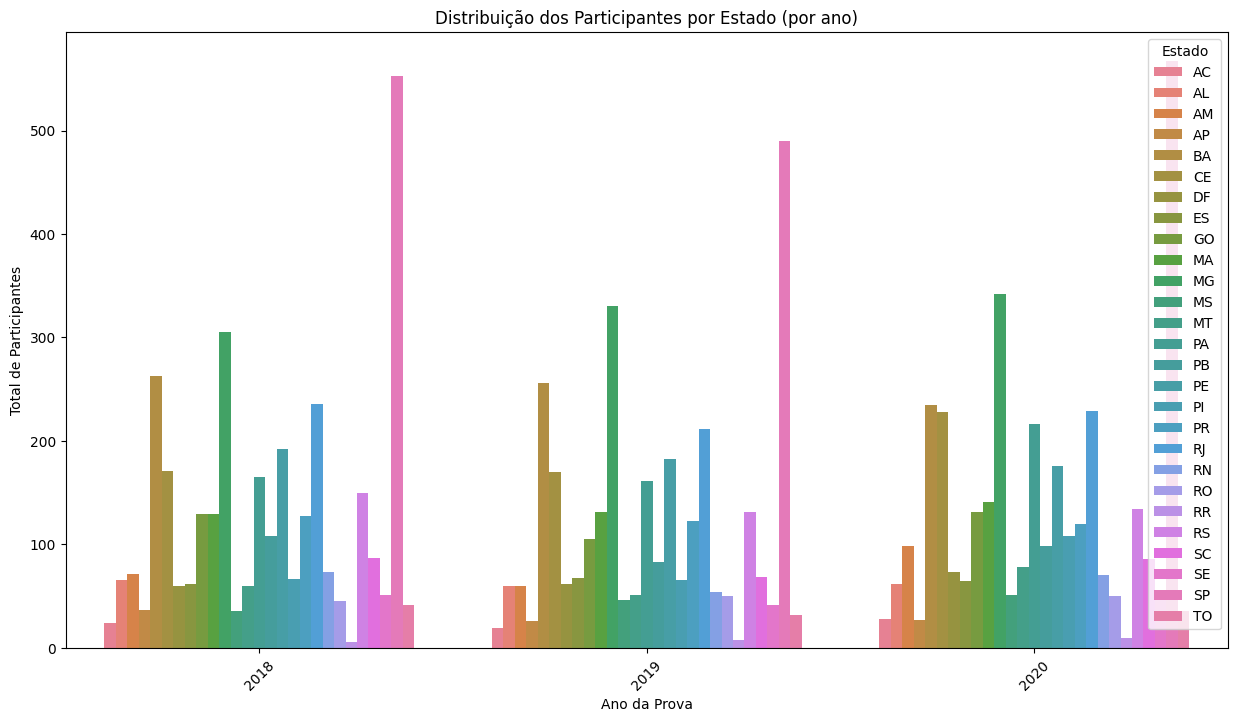

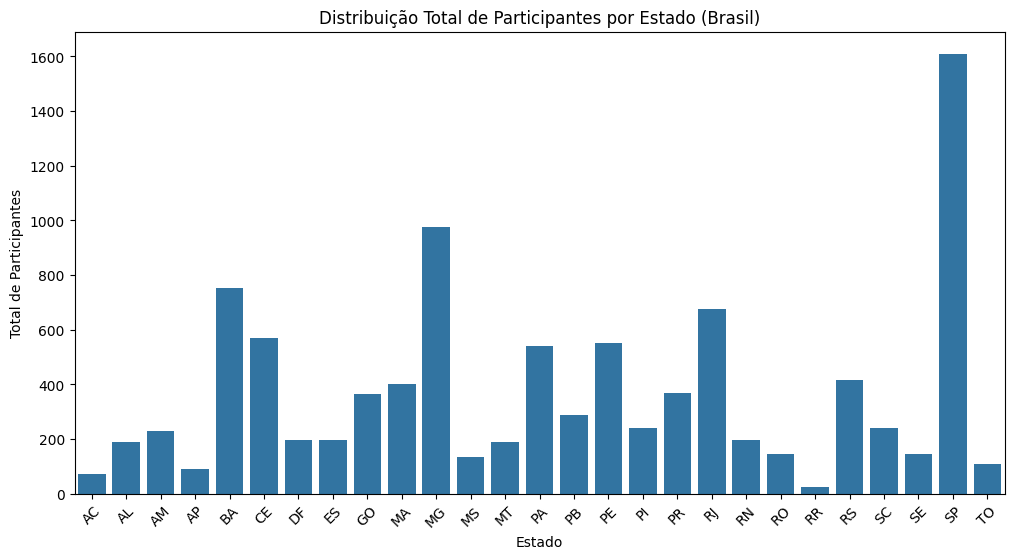

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns

# Agrupa os dados por ano e estado, contando o número de participantes em cada grupo
participantes_por_estado_ano = df.groupby(['NU_ANO', 'SG_UF_PROVA'])['NU_INSCRICAO'].count().reset_index()
participantes_por_estado_ano.rename(columns={'NU_INSCRICAO': 'TOTAL_PARTICIPANTES'}, inplace=True)


# Plota a distribuição dos participantes por estado em cada ano
plt.figure(figsize=(15, 8))
sns.barplot(x='NU_ANO', y='TOTAL_PARTICIPANTES', hue='SG_UF_PROVA', data=participantes_por_estado_ano)
plt.title('Distribuição dos Participantes por Estado (por ano)')
plt.xlabel('Ano da Prova')
plt.ylabel('Total de Participantes')
plt.xticks(rotation=45)
plt.legend(title='Estado')
plt.show()


# Distribuição total por estado no Brasil
total_participantes_estado = df.groupby('SG_UF_PROVA')['NU_INSCRICAO'].count().reset_index()
total_participantes_estado.rename(columns={'NU_INSCRICAO': 'TOTAL_PARTICIPANTES'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='SG_UF_PROVA', y='TOTAL_PARTICIPANTES', data=total_participantes_estado)
plt.title('Distribuição Total de Participantes por Estado (Brasil)')
plt.xlabel('Estado')
plt.ylabel('Total de Participantes')
plt.xticks(rotation=45)
plt.show()


In [4]:
# Group the data by year and state, then count the number of tests applied in each group.
provas_por_estado_ano = df.groupby(['NU_ANO', 'SG_UF_PROVA'])['NU_INSCRICAO'].count().reset_index()

# Rename the count column to 'total_provas' for clarity.
provas_por_estado_ano = provas_por_estado_ano.rename(columns={'NU_INSCRICAO': 'total_provas'})

# Find the maximum number of tests applied.
max_provas = provas_por_estado_ano['total_provas'].max()

# Filter the DataFrame to get the year and state with the maximum number of tests.
ano_estado_max_provas = provas_por_estado_ano[provas_por_estado_ano['total_provas'] == max_provas]

# Display the result
ano_estado_max_provas


,NU_ANO,SG_UF_PROVA,total_provas
79,2020,SP,567


In [19]:
# Filtra o DataFrame para o ano de 2018
df_2018 = df[df['NU_ANO'] == 2018]

# Calcula o terceiro quartil da nota em matemática em 2018
terceiro_quartil_matematica_2018 = df_2018['NU_NOTA_MT'].quantile(0.75)

print(f"O terceiro quartil nacional em matemática em 2018 é: {terceiro_quartil_matematica_2018}")


O terceiro quartil nacional em matemática em 2018 é: 600.05


<ipython-input-28-71515d02bdc2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SG_UF_PROVA', y='NU_NOTA_MT', data=df_2018, palette="Set3") # Usa a paleta de cores 'Set3'


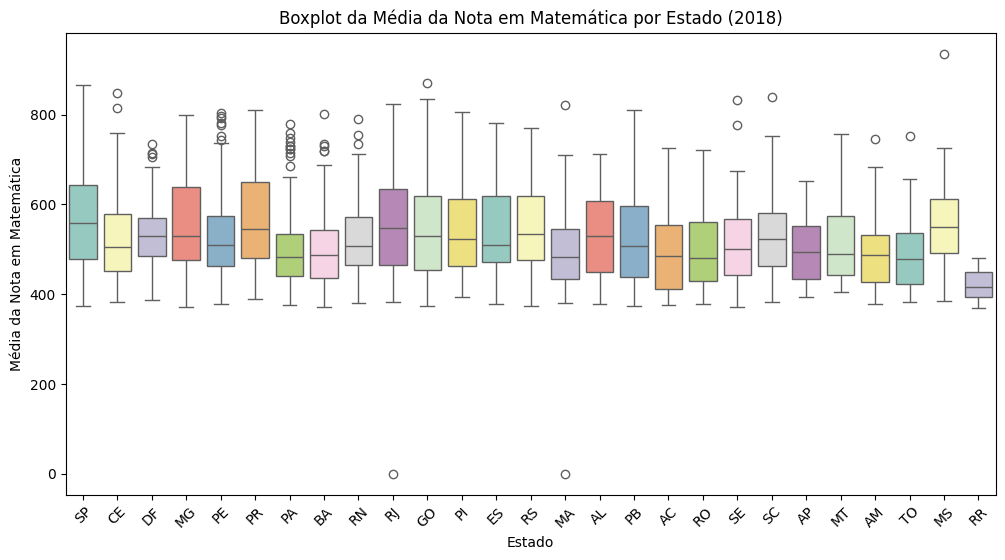

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra o DataFrame para o ano de 2018
df_2018 = df[df['NU_ANO'] == 2018]

# Calcula a média da nota em matemática por estado em 2018
media_matematica_por_estado_2018 = df_2018.groupby('SG_UF_PROVA')['NU_NOTA_MT'].mean().reset_index()

# Plota o boxplot com cores
plt.figure(figsize=(12, 6))
sns.boxplot(x='SG_UF_PROVA', y='NU_NOTA_MT', data=df_2018, palette="Set3") # Usa a paleta de cores 'Set3'
plt.title('Boxplot da Média da Nota em Matemática por Estado (2018)')
plt.xlabel('Estado')
plt.ylabel('Média da Nota em Matemática')
plt.xticks(rotation=45)
plt.show()


In [20]:
# Calcula as métricas nacionais para 2018
df_2018 = df[df['NU_ANO'] == 2018]
terceiro_quartil_nacional_2018 = df_2018['NU_NOTA_MT'].quantile(0.75)
media_nacional_2018 = df_2018['NU_NOTA_MT'].mean()

print(f"Média Nacional em Matemática em 2018: {media_nacional_2018}")
print(f"Terceiro Quartil Nacional em Matemática em 2018: {terceiro_quartil_nacional_2018}")

# Analisa as métricas por estado em 2018
metricas_por_estado = df_2018.groupby('SG_UF_PROVA')['NU_NOTA_MT'].agg(['quantile', 'mean'])
metricas_por_estado = metricas_por_estado.rename(columns={'quantile': 'Terceiro Quartil', 'mean': 'Média'})
metricas_por_estado['Terceiro Quartil'] = metricas_por_estado['Terceiro Quartil'].apply(lambda x: x if isinstance(x, (int, float)) else x[0.75])

# Compara as métricas de cada estado com as métricas nacionais
metricas_por_estado['Superior à Média Nacional'] = metricas_por_estado['Média'] > media_nacional_2018
metricas_por_estado['Superior ao Terceiro Quartil Nacional'] = metricas_por_estado['Terceiro Quartil'] > terceiro_quartil_nacional_2018

print("\nComparativo das Métricas por Estado:")
print(metricas_por_estado)

# Terceiro quartil de Roraima e comparação com o Brasil
terceiro_quartil_rr = metricas_por_estado.loc['RR', 'Terceiro Quartil']
print(f"\nTerceiro Quartil de Roraima em 2018: {terceiro_quartil_rr}")

comparacao_rr = "Superior" if terceiro_quartil_rr > terceiro_quartil_nacional_2018 else "Inferior"
print(f"O terceiro quartil de Roraima é {comparacao_rr} ao terceiro quartil nacional.")


Média Nacional em Matemática em 2018: 534.3408252853379
Terceiro Quartil Nacional em Matemática em 2018: 600.05

Comparativo das Métricas por Estado:
             Terceiro Quartil       Média  Superior à Média Nacional  \
SG_UF_PROVA                                                            
AC                     485.50  492.645455                      False   
AL                     529.80  533.363265                      False   
AM                     488.10  497.771429                      False   
AP                     493.30  501.864000                      False   
BA                     486.65  499.982609                      False   
CE                     505.20  523.486555                      False   
DF                     528.60  541.560976                       True   
ES                     509.05  544.481818                       True   
GO                     530.30  543.768889                       True   
MA                     483.20  493.475949                 

In [18]:
# Remove participantes que não fizeram a prova (considerando nota de matemática como exemplo)
df_com_prova = df.dropna(subset=['NU_NOTA_MT'])

# Calcula a mediana da nota de matemática para participantes onde os pais completaram o ensino médio
mediana_ensino_medio = df_com_prova[df_com_prova['Q001'] == 'E']['NU_NOTA_MT'].median()
print(f"Mediana das notas de matemática para participantes onde os pais completaram o ensino médio: {mediana_ensino_medio}")

# Calcula a mediana da nota de matemática para participantes onde os pais completaram a faculdade
mediana_faculdade = df_com_prova[df_com_prova['Q001'] == 'F']['NU_NOTA_MT'].median()
print(f"Mediana das notas de matemática para participantes onde os pais completaram a faculdade: {mediana_faculdade}")


Mediana das notas de matemática para participantes onde os pais completaram o ensino médio: 531.6
Mediana das notas de matemática para participantes onde os pais completaram a faculdade: 620.8499999999999
